In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [17]:
import pathlib
# data_dir = pathlib.Path('./dataset/PetImages/')
data_dir = pathlib.Path('./dataset/small_dataset/')

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1020


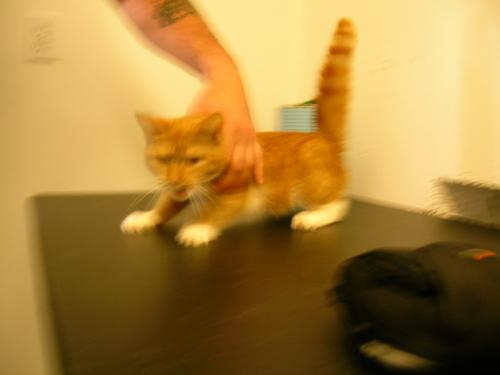

In [19]:
roses = list(data_dir.glob('Cat/*'))
PIL.Image.open(str(roses[0]))

In [20]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1020 files belonging to 2 classes.
Using 816 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1020 files belonging to 2 classes.
Using 204 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


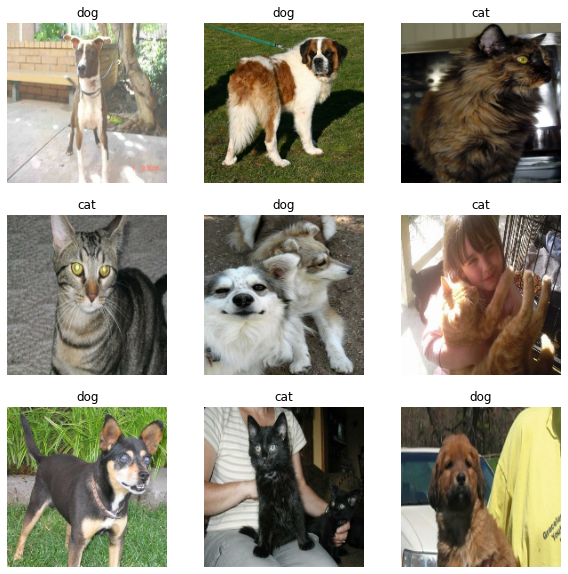

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
normalization_layer = layers.Rescaling(1./255)

In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
26/26 [==============================] - 11s 421ms/step - loss: 0.1145 - accuracy: 0.9645 - val_loss: 1.5160 - val_accuracy: 0.6078
Epoch 2/2
26/26 [==============================] - 11s 415ms/step - loss: 0.0556 - accuracy: 0.9853 - val_loss: 1.6503 - val_accuracy: 0.6422


In [54]:
def make_prediction(cat_or_dog, img_num):
  img = tf.keras.utils.load_img(
      f'./dataset/PetImages/{cat_or_dog}/{img_num}.jpg', target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

In [57]:
make_prediction('Dog', 7194)
make_prediction('Dog', 7199)
make_prediction('Dog', 7204)


make_prediction('Cat', 9033)
make_prediction('Cat', 9031)
make_prediction('Cat', 9038)

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to dog with a 99.91 percent confidence.
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to dog with a 99.64 percent confidence.
1/1 [==============================] - 0s 25ms/step
This image most likely belongs to cat with a 96.45 percent confidence.
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to cat with a 50.54 percent confidence.
1/1 [==============================] - 0s 28ms/step
This image most likely belongs to dog with a 84.38 percent confidence.
1/1 [==============================] - 0s 25ms/step
This image most likely belongs to dog with a 99.90 percent confidence.
